# Ví dụ 1

In [1]:
# import the necessary libraries
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 200 # number of points per class
d = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels
for j in range(C):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
    y[ix] = j

In [3]:
X.shape, y.shape

((2, 600), (600,))

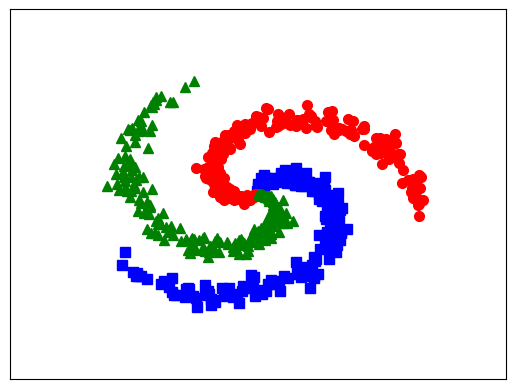

In [4]:
# lets visualize the data:
plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.savefig('example_points.png', bbox_inches='tight', dpi = 600)
plt.show()

In [5]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

In [6]:
# cost or loss function
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

In [7]:
## One-hot coding
from scipy import sparse
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

In [8]:
d0 = 2
d1 = h = 100 # size of hidden layer
d2 = C = 3
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))
Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 # learning rate

In [9]:
W1.shape, W2.shape, b1.shape, b2.shape, Y.shape, X.shape

((2, 100), (100, 3), (100, 1), (3, 1), (3, 600), (2, 600))

In [10]:
for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, X) + b1 # => 100 x 600
    A1 = np.maximum(Z1, 0) # <=> ReLU
    Z2 = np.dot(W2.T, A1) + b2 # => 3 x 600
    Yhat = softmax(Z2) 
    # print loss after each 1000 iterations
    if i % 1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Yhat)
        print("iter %d, loss: %f" %(i, loss))
    # backpropagation
    E2 = (Yhat - Y )/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)
    
    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

iter 0, loss: 1.098526
iter 1000, loss: 0.133017
iter 2000, loss: 0.067798
iter 3000, loss: 0.038292
iter 4000, loss: 0.028948
iter 5000, loss: 0.024143
iter 6000, loss: 0.021147
iter 7000, loss: 0.019128
iter 8000, loss: 0.017667
iter 9000, loss: 0.016553


In [11]:
Z1 = np.dot(W1.T, X) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = 100*np.mean(predicted_class == y)
print('training accuracy: %.2f %%' % (acc))

training accuracy: 99.67 %


(1, 14400)
200


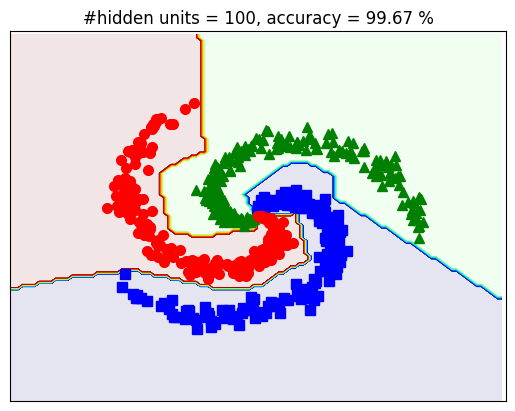

In [12]:
# Visualize results
xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()
print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)
# print(xx.shape, yy.shape)
# XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)
X0 = np.vstack((xx1, yy1))
# print(X.shape)
Z1 = np.dot(W1.T, X0) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
# predicted class

Z = np.argmax(Z2, axis=0)
Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)
# Plot also the training points
# plt.scatter(X[:, 1], X[:, 2], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
# X = X.T
N = 200
print(N)
plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks(())
plt.yticks(())
plt.title('#hidden units = %d, accuracy = %.2f %%' %(d1, acc))
# plt.axis('equal')
# display(X[1:, :], original_label)
fn = 'ex_res'+ str(d1) + '.png'
# plt.savefig(fn, bbox_inches='tight', dpi = 600)
plt.show()

`Bài tập tự thực hành`

# Ví dụ 2

In [13]:
import numpy as np
import time as t
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

##### a. giảm số chiều dữ liệu xuống còn 100 chiều (từ 28x28 = 784 chiều ban đầu) với tập dữ liệu 5000 ảnh bất kỳ.

In [14]:
idx = np.random.choice(len(train_X), size=5000, replace=False)

x_train_sampled = train_X[idx]
y_train_sampled = train_y[idx]

In [15]:
x_train_sampled.shape, y_train_sampled.shape

((5000, 28, 28), (5000,))

In [16]:
x_train_sampled = x_train_sampled.reshape(5000, -1)

In [17]:
x_train_sampled.shape

(5000, 784)

In [18]:
X = StandardScaler().fit_transform(x_train_sampled)
pca = PCA(n_components=100)
result = pca.fit_transform(X)

##### b. Áp dụng các phương pháp phân loại nhiều lớp: Multinomial Logistic Regression và ANN (đã có code) để phân loại, tỷ lệ train:test là 0.7:0.3

In [19]:
x_train, x_test, y_train, y_test = train_test_split(result, y_train_sampled, train_size=0.7)

In [20]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3500, 100), (3500,), (1500, 100), (1500,))

* Multinomial Logistic Regression

In [21]:
model = LogisticRegression()
model.fit(x_train, y_train)

c:\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred = model.predict(x_test)

In [23]:
# Tính các chỉ số đánh giá của mô hình
accuracy = accuracy_score(y_pred, y_test) # tính toán độ chính xác(accuracy) của mô hình dựa trên nhãn dự đoán và nhãn thực tế
print("Accuracy: {:.4f}".format(accuracy))

Accuracy: 0.8780


* ANN

In [24]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

In [25]:
# cost or loss function
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

In [26]:
## One-hot coding
from scipy import sparse
def convert_labels(y, C = 10):
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

In [27]:
d0 = 100
d1 = h = 100 # size of hidden layer
d2 = C = 10
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))
Y = convert_labels(y_train, C)
N = X.shape[1]
eta = 0.001 # learning rate

In [28]:
W1.shape, W2.shape, b1.shape, b2.shape, Y.shape, x_train.shape

((100, 100), (100, 10), (100, 1), (10, 1), (10, 3500), (3500, 100))

In [29]:
for i in range(5001):
    ## Feedforward
    Z1 = np.dot(W1.T, x_train.T) + b1 # => 100 x 3500
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2 # => 10 x 3500
    Yhat = softmax(Z2)
    # print loss after each 1000 iterations
    if i % 500 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Yhat)
        print("iter %d, loss: %f" %(i, loss))
    # backpropagation
    E2 = (Yhat - Y)/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(x_train.T, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)
    
    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

iter 0, loss: 2.302019
iter 500, loss: 1.796553
iter 1000, loss: 0.949866
iter 1500, loss: 0.581979
iter 2000, loss: 0.431931
iter 2500, loss: 0.361191
iter 3000, loss: 0.318761
iter 3500, loss: 0.289164
iter 4000, loss: 0.266467
iter 4500, loss: 0.248082
iter 5000, loss: 0.232616


In [30]:
Z1 = np.dot(W1.T, x_train.T) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = 100*np.mean(predicted_class == y_train)
print('training accuracy: %.2f %%' % (acc))

training accuracy: 93.54 %


In [31]:
Z1 = np.dot(W1.T, x_test.T) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = 100*np.mean(predicted_class == y_test)
print('test accuracy: %.2f %%' % (acc))

test accuracy: 90.07 %


# Ví dụ 3

In [327]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [328]:
# path to the database - change it if needed
path = 'face_data/face_data/'
ids = range(1, 16) # 15 people
states = ['centerlight', 'glasses', 'happy', 'leftlight', 'noglasses', 'normal', 'rightlight','sad', 'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.png' #file extension is png
# open one picture to get the image's size
fn = prefix + '01.' + states[0] + surfix
im = cv2.imread(path + fn, 0)
h = im.shape[0] # hight
w = im.shape[1] # width
D = h * w
N = len(states)*15
print(N, D, h, w)
X_original = np.zeros((D, N))
# collect all data
count = 0

Y = []
# there are 15 people
for person_id in range(1, 16):
    for state in states:
        Y.append(state)
        # get name of each image file
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        # open the file and read as grey image
        tmp = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)

        # then add image to dataset X
        X_original[:, count] = tmp.reshape(D)
        count += 1

165 77760 243 320


In [329]:
Y = np.array(Y)

In [330]:
Y.shape

(165,)

In [331]:
len(states)

11

In [332]:
# Convert label dạng chữ thành dạng số nguyên liên tục khác nhau

dict_y = {'centerlight': 0, 'glasses': 1, 'happy': 2, 'leftlight': 3, 'noglasses': 4, 'normal': 5, 'rightlight': 6,'sad': 7, 'sleepy': 8, 'surprised': 9, 'wink': 10}

y_encoded = list(map(dict_y.get, Y))
y_encoded = np.array(y_encoded)

In [333]:
Y

array(['centerlight', 'glasses', 'happy', 'leftlight', 'noglasses',
       'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink',
       'centerlight', 'glasses', 'happy', 'leftlight', 'noglasses',
       'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink',
       'centerlight', 'glasses', 'happy', 'leftlight', 'noglasses',
       'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink',
       'centerlight', 'glasses', 'happy', 'leftlight', 'noglasses',
       'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink',
       'centerlight', 'glasses', 'happy', 'leftlight', 'noglasses',
       'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink',
       'centerlight', 'glasses', 'happy', 'leftlight', 'noglasses',
       'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink',
       'centerlight', 'glasses', 'happy', 'leftlight', 'noglasses',
       'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink',
       'centerlight', 'glasses', 'happy',

In [334]:
y_encoded

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [335]:
X_original.shape, y_encoded.shape

((77760, 165), (165,))

#### c. Giảm số chiều dữ liệu xuống còn 100

In [336]:
X = StandardScaler().fit_transform(X_original.T)
pca = PCA(n_components=100)
result = pca.fit_transform(X)

#### d. Áp dụng các phương pháp phân loại nhiều lớp: Multinomial Logistic Regression và ANN (đã có code) để phân loại, tỷ lệ train:test là 0.7:0.3

In [337]:
x_train, x_test, y_train, y_test = train_test_split(result, y_encoded, train_size=0.7)

In [338]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((115, 100), (115,), (50, 100), (50,))

* Multinomial Logistic Regression

In [339]:
model = LogisticRegression(multi_class='multinomial')
model.fit(x_train, y_train)

c:\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [340]:
y_pred = model.predict(x_test)

In [341]:
y_pred

array([ 5,  7,  5,  5,  8,  5,  7,  5,  9,  1,  5,  5,  5,  9,  0,  4,  9,
        1,  7,  3,  3,  4,  5,  1,  3,  4,  5,  9,  2,  1,  7,  6,  4,  8,
        4,  2,  8,  6,  5,  5,  5,  9,  7, 10,  3, 10,  6,  3,  9,  7])

In [342]:
y_test

array([ 9,  8,  4,  2,  1,  4,  7,  7,  0,  0,  7,  1,  2,  2,  6,  2,  4,
        6,  1,  3,  3,  5, 10,  4,  3,  2,  4,  0,  9,  0,  2,  6,  5,  5,
       10, 10,  4,  6,  2,  1,  9,  8,  5, 10,  3,  0,  6,  3,  8,  2])

In [343]:
# Tính các chỉ số đánh giá của mô hình
accuracy = accuracy_score(y_pred, y_test) # tính toán độ chính xác(accuracy) của mô hình dựa trên nhãn dự đoán và nhãn thực tế
print("Accuracy: {:.4f}".format(accuracy))

Accuracy: 0.2000


* ANN

In [344]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

In [345]:
# cost or loss function
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

In [346]:
## One-hot coding
from scipy import sparse
def convert_labels(y, C = 10):
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

In [347]:
d0 = 100
d1 = h = 100 # size of hidden layer
d2 = C = 11
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))
Y = convert_labels(y_train, C)
N = X.shape[1]
eta = 1 # learning rate

In [348]:
W1.shape, W2.shape, b1.shape, b2.shape, Y.shape, x_train.shape


((100, 100), (100, 11), (100, 1), (11, 1), (11, 115), (115, 100))

In [349]:
for i in range(20001):
    ## Feedforward
    Z1 = np.dot(W1.T, x_train.T) + b1 # => 100 x 3500
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2 # => 10 x 3500
    Yhat = softmax(Z2)
    # print loss after each 1000 iterations
    if i % 1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Yhat)
        print("iter %d, loss: %f" %(i, loss))
    # backpropagation
    E2 = (Yhat - Y)/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(x_train.T, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)
    
    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

iter 0, loss: 2.425923
iter 1000, loss: 0.295301
iter 2000, loss: 0.138033
iter 3000, loss: 0.095160
iter 4000, loss: 0.076515
iter 5000, loss: 0.066226
iter 6000, loss: 0.059739
iter 7000, loss: 0.055259
iter 8000, loss: 0.052006
iter 9000, loss: 0.049549
iter 10000, loss: 0.047637
iter 11000, loss: 0.046113
iter 12000, loss: 0.044880
iter 13000, loss: 0.043875
iter 14000, loss: 0.043048
iter 15000, loss: 0.042351
iter 16000, loss: 0.041768
iter 17000, loss: 0.041273
iter 18000, loss: 0.040847
iter 19000, loss: 0.040479
iter 20000, loss: 0.040157


In [350]:
Z1 = np.dot(W1.T, x_train.T) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = 100*np.mean(predicted_class == y_train)
print('training accuracy: %.2f %%' % (acc))

training accuracy: 97.39 %


In [351]:
Z1 = np.dot(W1.T, x_test.T) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = 100*np.mean(predicted_class == y_test)
print('test accuracy: %.2f %%' % (acc))

test accuracy: 20.00 %


#### e. Coi toàn bộ 165 ảnh đầu vào là train, tìm 5 ảnh chân dung (tùy ý) sau đó đưa về cùng kích thước như trong ảnh dữ liệu (H = 320; W = 243), với phần chân dung lệch sang tay phải theo hướng người nhìn vào. Thử dụng mô hình đã huấn luyện, chạy test xem 5 ảnh dữ liệu mới sẽ thuộc nhóm nào.

In [352]:
d0 = 100
d1 = h = 100 # size of hidden layer
d2 = C = 11
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))
Y = convert_labels(y_encoded, C)
N = X.shape[1]
eta = 1 # learning rate

In [353]:
W1.shape, W2.shape, b1.shape, b2.shape, y_encoded.shape, result.shape

((100, 100), (100, 11), (100, 1), (11, 1), (165,), (165, 100))

In [354]:
y_encoded.shape

(165,)

In [355]:
Y.shape

(11, 165)

In [356]:
for i in range(20001):
    ## Feedforward
    Z1 = np.dot(W1.T, result.T) + b1 # => 100 x 3500
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2 # => 10 x 3500
    Yhat = softmax(Z2)
    # print loss after each 1000 iterations
    if i % 1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Yhat)
        print("iter %d, loss: %f" %(i, loss))
    # backpropagation
    E2 = (Yhat - Y)/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(result.T, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)
    
    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

iter 0, loss: 2.461865
iter 1000, loss: 0.341602
iter 2000, loss: 0.174306
iter 3000, loss: 0.130104
iter 4000, loss: 0.110994
iter 5000, loss: 0.100655
iter 6000, loss: 0.094407
iter 7000, loss: 0.090319
iter 8000, loss: 0.087484
iter 9000, loss: 0.085458
iter 10000, loss: 0.083946
iter 11000, loss: 0.082781
iter 12000, loss: 0.081869
iter 13000, loss: 0.081148
iter 14000, loss: 0.080561
iter 15000, loss: 0.080075
iter 16000, loss: 0.079668
iter 17000, loss: 0.079322
iter 18000, loss: 0.079026
iter 19000, loss: 0.078769
iter 20000, loss: 0.078545


In [357]:
Z1 = np.dot(W1.T, x_test.T) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = 100*np.mean(predicted_class == y_test)
print('test accuracy: %.2f %%' % (acc))

test accuracy: 90.00 %


--------

test

In [358]:
# path to the database - change it if needed
# path = 'face_data/face_data/'
ids = range(1, 4) # 15 people
# states = ['centerlight', 'glasses', 'happy', 'leftlight', 'noglasses', 'normal', 'rightlight','sad', 'sleepy', 'surprised', 'wink' ]
prefix = 'test'
surfix = '.png' #file extension is png
# open one picture to get the image's size
fn = prefix + '1' + surfix
im = cv2.imread(fn, 0)
h = im.shape[0] # hight
w = im.shape[1] # width
D = h * w
N = 5
print(N, D, h, w)


5 77760 243 320


In [359]:
X_test = np.zeros((D, N))

In [360]:
# X = np.zeros((D, N))
# collect all data
count = 0
# there are 15 people
for person_id in range(1, 6):
        # get name of each image file
        fn = prefix + str(person_id).zfill(1) + surfix
        # open the file and read as grey image
        tmp = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
        # then add image to dataset X
        X_test[:, count] = tmp.reshape(D)
        count += 1

In [361]:
X_test.shape

(77760, 5)

In [362]:
X_original.shape

(77760, 165)

In [363]:
X_test_pca = pca.transform(X_test.T)

In [364]:
W1.shape, W2.shape, b1.shape, b2.shape, X_test.shape, X_test_pca.shape

((100, 100), (100, 11), (100, 1), (11, 1), (77760, 5), (5, 100))

In [365]:
Z1 = np.dot(W1.T, X_test_pca.T) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
# acc = 100*np.mean(predicted_class == y_test)
# print('test accuracy: %.2f %%' % (acc))

In [366]:
predicted_class

array([0, 0, 4, 4, 0], dtype=int64)

In [367]:
# Hàm ánh xạ các giá trị trong mảng về chữ dựa trên dictionary dict_y
vfunc = np.vectorize(lambda x: [k for k, v in dict_y.items() if v == x][0])
y_str = vfunc(predicted_class)

In [368]:
y_str

array(['centerlight', 'centerlight', 'noglasses', 'noglasses',
       'centerlight'], dtype='<U11')